# Scrooge Coin Project
## Nadeen Ahmad Shoukry 37-4023 T-11
### ❖  All needed imports to run this notebook

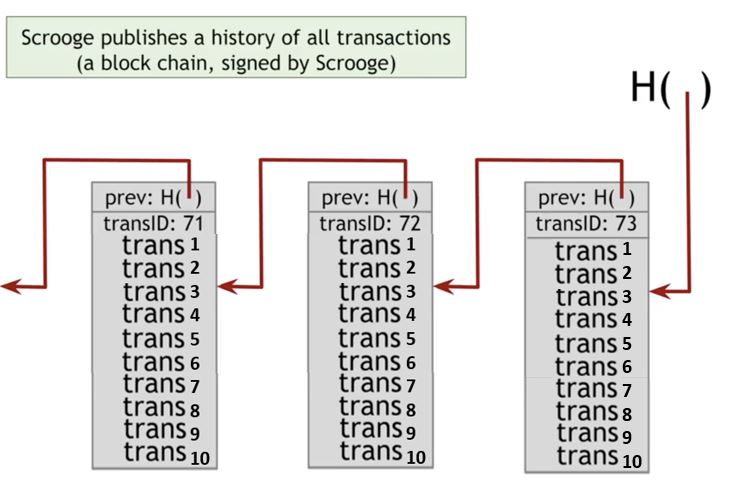

In [1]:
import IPython
url = 'https://i.ibb.co/2swZwjH/Structure.jpg'
IPython.display.Image(url, width = 600)

In [2]:
# All imports needed to run this code
import keyboard
import hashlib
from ellipticcurve.ecdsa import Ecdsa
from ellipticcurve.privateKey import PrivateKey
import random

### ❖  Path of text file to save output

In [3]:
# path of text file to save output
path = "C:/Users/nadeen/Desktop/output.txt"

### ❖  Block

In [4]:
# A class block is created with 3 attributes:
# - A transaction appended to the list of transactions
# - A hash pointer to previous block in chain 
# - ID
# The block also has an attribute to store the hash value of the block
# The class has 1 method: 
# - Add transactions to append a new transaction to the list of transactions

class Block():
    def __init__(self, transaction, hash_previous_block, id):
        self.id = id
        self.transactions = []
        self.transactions.append(transaction)
        self.hash_previous_block = hash_previous_block
        self.hash_block = None
# Using this function transactions can be added to the block 
    def add_Transaction(self, transaction):
             self.transactions.append(transaction)
             self.hash_block = hash_object(self)

### ❖  Hashing Function

In [5]:
# Hashing function to produce the hash of a string
def hash_sha256(encoded_str):
    hashfunc = hashlib.sha256()
    hashfunc.update(encoded_str)
    return hashfunc.hexdigest()
# Hashing function to produce the hash of an object
def hash_object(obj):
    return hash_sha256(str(obj).encode('utf-8'))

### ❖  BlockChain

In [6]:
# The Scrooge append only ledger is created with a block chain
# Such that when a transaction is issued by scrooge it is added to the last 
# block in the ledger 
# A block can have a maximum of 10 transactions
# if the last block is full a new block is created and added to the chain
class BlockChain():
    def __init__(self):
        self.blocks = []
    def add_trans_to_chain(self, transaction):
        prevHash = -1
        if len(self.blocks) > 0:
            prevHash = hash_sha256(str(self.blocks[-1]).encode('utf-8'))
        else:
            prevHash = None
        if(len(self.blocks) > 0):
            temp = self.blocks[-1]
            size = len(self.blocks[-1].transactions)
            if(size <10):
                temp.add_Transaction(transaction)
            else:
                newBlock = Block(transaction ,prevHash , len(self.blocks))
                self.blocks.append(newBlock)
        else:
                newBlock = Block(transaction , prevHash ,0)
                self.blocks.append(newBlock)
        
            

### ❖  Transaction

In [7]:
#Generic class transaction children(create coins , pay coins)
class Transaction():
    pass

### ❖  Coin Creation Transaction

In [8]:
# This transaction is created by scrooge with 2 attributes :
# - Coin
# - ID  
class CoinCreation(Transaction):
    def __init__(self,coin, id):
        self.coin = coin
        self.id = id

### ❖  Payment Transaction

In [9]:
# This transaction is created with 3 attributes :
# - Value of coin
# - Coin spender
# - Coin receiver
# This transaction has an ID,  a coin and a hash to the previous transaction
class Payment(Transaction):
    def __init__(self,value, giver, receiver):
        self.value = value
        self.giver = giver
        self.receiver = receiver
        self.id = -1
        self.coin = None
        self.hash_prev_trans = None
        

### ❖  Scrooge

In [10]:
# The class scrooge has 2 attributes
# - A blockchain
# - A user to make scrooge have a public key & a private key 
class Scrooge():
    def __init__(self):
        self.BlockChain = BlockChain()
        self.saveCoins = []
        self.user = User()
# This method enables scrooge to sign the hash of the last block in the blockchain with his private key
    def sign_last_block_hash(self, block):
        tmp = block.hash_block
        Ecdsa.sign(tmp, self.user.privateKey) 
# This method gets the hash of the last transaction this coin appeared in
# When creating a payment transaction with a coin
# this method is called to fetch the last transaction that has this coin from the published ledger
# then this transaction is hashed
    def get_hash_prev_trans(self,coinID):
            tans = None
            if(len(self.BlockChain.blocks) >0):
                for i in range(len(self.BlockChain.blocks)):
                    for j in range(len(self.BlockChain.blocks[i].transactions)):
                            if(self.BlockChain.blocks[i].transactions[j].coin.id == coinID):
                                 trans = self.BlockChain.blocks[i].transactions[j]
            return trans.id
# scrooge initiates a coin creation transaction
    def coinCreation(self,value , user):
        coin = Coin(user, value, len(self.saveCoins))
        self.saveCoins.append(coin)
        #create a transaction to create coins
        #the id of the transaction is a 2 digit number (block index, transaction index)
        trans_id = -1
        if(len(self.BlockChain.blocks) >0):
            trans_id = len(self.BlockChain.blocks) * 10 + len(self.BlockChain.blocks[-1].transactions)
        else:
            trans_id = 10
        temp = CoinCreation(coin, trans_id)
        #add transaction to the block chain
        self.BlockChain.add_trans_to_chain(temp)
# this method makes scrooge process the payment transactions issued by the users 
    def processPayment(self, Payment):
        #verify signature 
        verify = None
# scrooge verfifies the transaction using the spenders public key 
        if isinstance(Payment.giver, Scrooge):
            verify = Ecdsa.verify(hash_object(Payment), Ecdsa.sign(hash_object(Payment), Payment.giver.user.privateKey) , Payment.giver.user.publicKey)
        else:
            verify = Ecdsa.verify(hash_object(Payment),Ecdsa.sign(hash_object(Payment), Payment.giver.privateKey) , Payment.giver.publicKey)  
        if(verify):
        #verify balance, owner has the amount no double spending 
        # a transaction with same coin has not been published in the ledger before
            my_coins =[]
            consumed_coin = None
            verify_balance = False 
            index= -1
            #get the giver coins
            for x in range(len(self.saveCoins)):
                if isinstance(Payment.giver, Scrooge):
                     if(self.saveCoins[x].user.publicKey == Payment.giver.user.publicKey):
                            my_coins.append(self.saveCoins[x])
                else:
                     if(self.saveCoins[x].user.publicKey == Payment.giver.publicKey):
                            my_coins.append(self.saveCoins[x])
            #check if balance is available 
            for y in range(len(my_coins)):
                if(my_coins[y].value == Payment.value):
                    consumed_coin = my_coins[y]
                    index = y
                    verify_balance = True
                    break
                break
                    
            if(verify_balance):
                #change owner of coin
                self.saveCoins[index].user = p.receiver
                #id of payment transaction
                if(len(self.BlockChain.blocks) >0):
                      p.id = len(self.BlockChain.blocks) * 10 + len(self.BlockChain.blocks[-1].transactions)
                else:
                      p.id = 10
                #publish transaction in ledger
                p.coin = consumed_coin
                save = self.get_hash_prev_trans(consumed_coin.id)
                # calculate the hash of the last transaction the contains this coin and add to the new transaction
                p.hash_prev_trans = hash_object(save)
                self.BlockChain.add_trans_to_chain(p)
                        
            
                   
        

### ❖  Coin

In [11]:
# The class coin has 3 attributes:
# - The owner of the coin
# - Value of the coin
# - ID of coin
class Coin():
    def __init__(self, user, value, id):
        self.value= value
        self.user = user
        self.id = id

### ❖  User

In [12]:
#Ecdsa is used to generate a unique pair of keys for each user
# A user signs the payment transaction with his/her private key so later on scrooge can verify it with the user's public key
# The user can create payment to any user with any amount
class User():
    def __init__(self):
        self.privateKey = PrivateKey()
        self.publicKey = self.privateKey.publicKey()
    def sign(self, Payment):
        message = hash_object(Payment)
        signature = Ecdsa.sign(message, self.privateKey)
    def createPayment(self, value, receiver):
        return Payment(value, self , receiver)

### ❖  Helper to create assign 10 coins with random amounts to each user

In [13]:
# Helper function to create 100 users 
# Give each user 10 coins with random amounts 
# Print each user's ID , public key and list of coins
def usersCreation():
    returnString =""
    values = [200, 300 , 400]
    for i in range(len(users)):
        for j in range(10):
            scrooge.coinCreation(random.choice(values), users[i])
    for i in range(len(users)):
        returnString += str(("User#", i+1 , " public key: ", hash_object(users[i].publicKey.toString())))
        returnString += "\n"
        print("User#", i+1 , " public key: ", hash_object(users[i].publicKey.toString()))
        x=0
        for j in range(len(scrooge.saveCoins)):
            if(scrooge.saveCoins[j].user.publicKey == users[i].publicKey):
                    x+=1
                    print("Coin#",x,": coin ID: ", scrooge.saveCoins[j].id,"  Value: ",scrooge.saveCoins[j].value)
                    returnString += str(("Coin#",x,": coin ID: ", scrooge.saveCoins[j].id,"  Value: ",scrooge.saveCoins[j].value))
                    returnString += "\n"
    return returnString 

### ❖  Helper to print a Block

In [14]:
def printBlock( block):
    returnString = ""
    print("Block: ", block.id, " Hash to previous block: ", block.hash_previous_block)
    returnString += str(("Block: ", block.id, " Hash to previous block: ", block.hash_previous_block))
    print("Block hash value ", block.hash_block)
    returnString += "\n"
    returnString += str(("Block hash value ", block.hash_block))
    print ('-'*120)
    returnString += "\n"
    returnString += str(('-'*120))
    returnString += "\n"
    for i in range(len(block.transactions)):
        if isinstance(block.transactions[i], CoinCreation):
                print("Trans_ID: ", block.transactions[i].id ," Type: Coin Creation ")
                returnString += str(("Trans_ID: ", block.transactions[i].id ," Type: Coin Creation "))
                returnString += "\n"
                print("Coin_ID: ", block.transactions[i].coin.id," Value: ", block.transactions[i].coin.value, " Owner: ",hash_object(block.transactions[i].coin.user.publicKey.toString()))
                returnString += str(("Coin_ID: ", block.transactions[i].coin.id," Value: ", block.transactions[i].coin.value, " Owner: ",hash_object(block.transactions[i].coin.user.publicKey.toString())))
                returnString += "\n"
                print ('-'*120)
                returnString += str(('-'*120))
                returnString += "\n"
        else:
              if isinstance(block.transactions[i], Payment): 
                    print("Trans_ID: ", block.transactions[i].id," Type: Payment ")
                    returnString += str(("Trans_ID: ", block.transactions[i].id," Type: Payment "))
                    returnString += "\n"
                    print("Hash to prev tans: ", block.transactions[i].hash_prev_trans )
                    returnString += str(("Hash to prev tans: ", block.transactions[i].hash_prev_trans ))
                    returnString += "\n"
                    print("Coin Giver: ", hash_object(block.transactions[i].giver.publicKey.toString()))
                    returnString += str(("Coin Giver: ", hash_object(block.transactions[i].giver.publicKey.toString())))
                    returnString += "\n"
                    print("Coin Receiver: ", hash_object(block.transactions[i].receiver.publicKey.toString()))
                    returnString+= str(("Coin Receiver: ", hash_object(block.transactions[i].receiver.publicKey.toString())))
                    returnString += "\n"
                    print("Coin_ID: ", block.transactions[i].coin.id," Value: ", block.transactions[i].coin.value)
                    returnString += str(("Coin_ID: ", block.transactions[i].coin.id," Value: ", block.transactions[i].coin.value))
                    returnString += "\n"
                    print("Coin Owner: ", hash_object(block.transactions[i].coin.user.publicKey.toString()))
                    returnString += str(("Coin Owner: ", hash_object(block.transactions[i].coin.user.publicKey.toString())))
                    returnString += "\n"
                    print ('-'*120)
                    returnString += str(('-'*120))
                    returnString += "\n"
    print ('*'*120)
    returnString += str(('*'*120))
    returnString += "\n"
    return returnString                    

### ❖  Helper to print the BlockChain

In [15]:
def printBlockChain( blockchain):
    returnString = ""
    for i in range(len(blockchain.blocks)):
        printBlock(blockchain.blocks[i])
        returnString += str(blockchain.blocks[i])
    return returnString

## Create Network:
### ❖ Create an instance of the class Scrooge
### ❖ Create 100 users 
### ❖ Create 10 coins for each user: (1000 coins)
### ❖ Print initially the public key and the amount of coins for each user. 
### ❖  Generate Random Transactions with Random amounts till the code is terminated with 'Space'

In [16]:
# create entity of scrooge
scrooge = Scrooge()
# random amounts of coins
values = [200,300,400]
# list of users
users = list()
# fill list of users with 100 users
for i in range(100):
        users.append(User())
# assign 10 coins to each user
myString = usersCreation()
# until space key is pressed
while True:
# create payments with random givers , receivers & amounts
    giver  = random.choice(users)
    receiver = random.choice(users)
    amount  = random.choice(values)
# if this random transaction has different giver and receiver
# create a payment with those attributes
    if(giver.publicKey != receiver.publicKey):
                p = Payment(amount ,giver, receiver)
# assign the payment to scrooge to verify it if the giver has sufficient balance, no double spending & the signature is verified
                scrooge.processPayment(p) 
                if(len(scrooge.BlockChain.blocks) > 100):
                        print("BLOCK UNDER CONSTRUCTION")
                        myString += "BLOCK UNDER CONSTRUCTION"
                        myString += "\n"
                        myString += printBlock(scrooge.BlockChain.blocks[-1])
                        print("BLOCKCHAIN")
                        myString += "BLOCKCHAIN"
                        myString += "\n"
                        for i in range(100, len(scrooge.BlockChain.blocks)):
                            myString += printBlock(scrooge.BlockChain.blocks[i])
                            myString += "\n" 
    if(keyboard.is_pressed('space')):
        scrooge.sign_last_block_hash(scrooge.BlockChain.blocks[-1])
        text_file = open(path, "w")
        n = text_file.write(myString)
        text_file.close()
        print("you pressed space!")  
        global stop
        stop = True
        break                         
    else:                                   
        pass             

User# 1  public key:  b39f19abbda7fb3095c2acd9e36d037221717bcb1e5e53d1529fc3ce2029190a
Coin# 1 : coin ID:  0   Value:  400
Coin# 2 : coin ID:  1   Value:  400
Coin# 3 : coin ID:  2   Value:  200
Coin# 4 : coin ID:  3   Value:  300
Coin# 5 : coin ID:  4   Value:  400
Coin# 6 : coin ID:  5   Value:  300
Coin# 7 : coin ID:  6   Value:  200
Coin# 8 : coin ID:  7   Value:  200
Coin# 9 : coin ID:  8   Value:  200
Coin# 10 : coin ID:  9   Value:  300
User# 2  public key:  b01f8b0cc96125d08ee4fc0f428a71207a187e8b87951aa45ad74913320904e2
Coin# 1 : coin ID:  10   Value:  200
Coin# 2 : coin ID:  11   Value:  200
Coin# 3 : coin ID:  12   Value:  200
Coin# 4 : coin ID:  13   Value:  400
Coin# 5 : coin ID:  14   Value:  200
Coin# 6 : coin ID:  15   Value:  300
Coin# 7 : coin ID:  16   Value:  400
Coin# 8 : coin ID:  17   Value:  300
Coin# 9 : coin ID:  18   Value:  400
Coin# 10 : coin ID:  19   Value:  300
User# 3  public key:  9ef15f60969a5ed7a01d75f4d9fa61eae52b1b0b13e84e1e307fefbc261cae29
Coin# 1